In [1]:
from gas_hale import GasPoweredHALE
import gpkit
import numpy as np
gpkit.settings['latex_modelname'] = False

# to modify the GasPoweredHALE model, edit gas_hale.py

m = GasPoweredHALE()
m.substitutions.update({'t': 6})
sol = m.solve()

Using solver 'cvxopt'
Solving for 20 variables.
Solving took 0.263 seconds.

Cost
----
 514 [lbf] 

Free Variables
--------------
              C_D : 0.04135                Drag coefficient              
              C_L : 1.018                  Lift coefficient              
              C_f : 0.00496                wing skin friction coefficient
       C_{Torque} : 0.1503                 Torque coefficient            
        P_{shaft} : 4438       [W]         Shaft power                   
               Re : 7.394e+05              Reynolds number               
                S : 4.437      [m**2]      Wing reference area           
          T_{atm} : 248        [K]         air temperature               
                V : 43         [m/s]       Cruise velocity               
                W : 514        [lbf]       Aircraft weight               
     W_{airframe} : 154.2      [lbf]       Airframe weight               
W_{eng-installed} : 23.47      [lbf]       Installed eng

In [3]:
x = sol('W_{fuel}')/sol('W')
y = sol('W_{pay}')/sol('W')
z = sol('P_{shaft}')/745.699872
print x
print y
print z

0.652047478924
0.0127873401445
4.7565754124


In [44]:
import numpy as np
m.substitutions.update({"t": ('sweep', np.linspace(4, 7, 5)),
                        "d_{footprint}": ('sweep', np.linspace(0.1,0.4,5))})
sol = m.solve(solver="mosek", verbosity=0, skipsweepfailures=True)

NameError: name 'm' is not defined

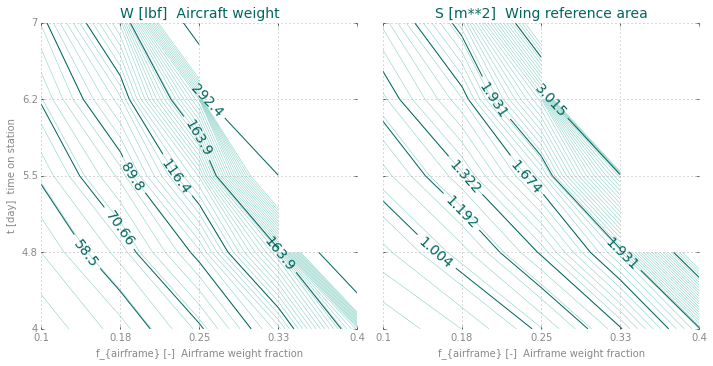

In [45]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
_ = contour_array(m, "f_{airframe}", "t", ["W", "S"])